In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_style("darkgrid")

def rm_outliers(df):
    return df[df - df.mean() <= 3*df.std()]

def plot_stuff(f, name):
    data = pd.read_csv(f)
    eg = rm_outliers(data['eg'])
    ch = rm_outliers(data['ch'])
    
    describe = {'eg': eg.describe(), 'ch': ch.describe()}
    print name
    print '---'
    print describe['eg']
    print '---'
    print describe['ch']
    
    sns.distplot(eg, hist=False, kde_kws={'label': 'eg'})
    sns.distplot(ch, hist=False, kde_kws={'label': 'ch'})
    
    lower = min([describe[x]['mean'] - 3*describe[x]['std'] for x in ('eg', 'ch')])
    upper = max([describe[x]['mean'] + 3*describe[x]['std'] for x in ('eg', 'ch')])
    plt.xlabel('nanosegundos')
    plt.xlim(lower, upper)
    
    #plt.savefig(name+'.png', format='png', bbox_inches = 'tight', dpi = 100)
    plt.show()

## ATP y NBA distribution

## Comparar a varios tamaños de N:M

## misma C, b cambia

## generador mismo match count??

## Cholesky vs EG
En un sistema con 1000 partidos, el método mas eficaz depende de la cantidad de equipos que juegan.

nba
---
count      987.000000
mean     29571.159068
std       7353.254558
min      11862.000000
25%      26615.000000
50%      27137.000000
75%      32898.500000
max      59032.000000
Name: eg, dtype: float64
---
count       995.000000
mean      40935.722613
std       14886.518463
min       16548.000000
25%       32350.000000
50%       38299.000000
75%       46302.000000
max      153012.000000
Name: ch, dtype: float64


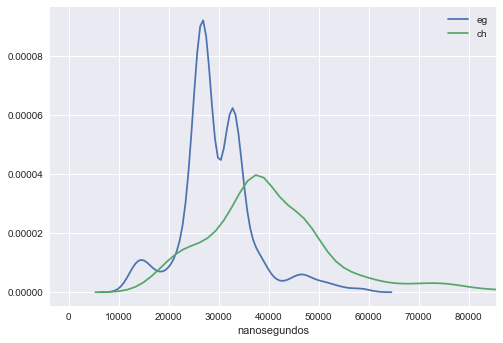

atp
---
count    9.780000e+02
mean     2.096023e+07
std      3.614481e+06
min      1.768347e+07
25%      1.871845e+07
50%      1.971577e+07
75%      2.144086e+07
max      3.952288e+07
Name: eg, dtype: float64
---
count    9.800000e+02
mean     1.452178e+07
std      1.248011e+06
min      1.291725e+07
25%      1.363160e+07
50%      1.412143e+07
75%      1.494426e+07
max      2.078657e+07
Name: ch, dtype: float64


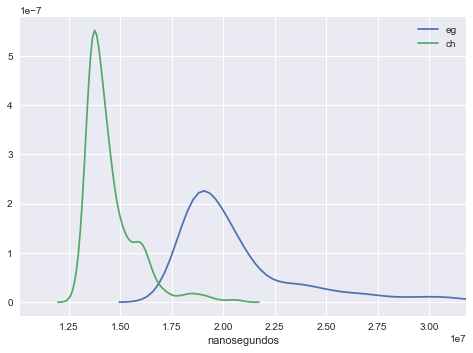

In [5]:
plot_stuff('csv/nba.csv', 'nba')
plot_stuff('csv/atp.csv', 'atp')


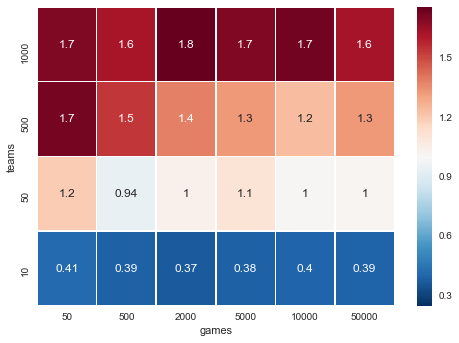

In [4]:
d={'games':[],'teams':[], 'ratio':[]}
for t in [10,50,500,1000]:
    for g in [50,500,2000,5000,10000,50000]:
        data = pd.read_csv('csv/{}_{}.csv'.format(t,g))
        eg = data['eg']
        ch = data['ch']
        d['games'].append(g)
        d['teams'].append(t)
        d['ratio'].append(eg.mean()/ch.mean())

df = pd.DataFrame(d)
df = df.pivot('teams', 'games', 'ratio')[::-1]
sns.heatmap(df, annot=True, linewidths=.5, center=1)
#plt.savefig('heatmap.png', format='png', bbox_inches = 'tight', dpi = 100)
plt.show()